<a href="https://colab.research.google.com/github/celinaLind/brain-tumor-classification/blob/main/Project_2_AI_Brain_Tumor_MRI_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #allows us to access the dataset we will load in the dataset
import pandas as pd #the data manipulation library we will be using
import numpy as np #allows us to do numerical computing
import matplotlib.pyplot as plt #allow us to visualize our data
import seaborn as sns #allows for more advanced visualizations

In [ ]:
# load in kaggle dataset through command line
# ! an exclamation point means you are running a command on notebook
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

# the above command will download the dataset called from "username/datasetName"
# and will unzip those files in collab for us to use

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 137M/149M [00:01<00:00, 87.6MB/s]
100% 149M/149M [00:01<00:00, 104MB/s] 


In [ ]:
# create a dataframe with designated paths to each type of brain tumor
# gets the metadata from the training/testing path to store in dataframe
def get_class_paths(path): # path is the directory for the dataset
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df

In [ ]:
# within colab path is always "/content/.../..."
train_df = get_class_paths("/content/Training")

In [ ]:
train_df

Class Path      Class
0     /content/Training/pituitary/Tr-pi_0140.jpg  pituitary
1     /content/Training/pituitary/Tr-pi_0514.jpg  pituitary
2     /content/Training/pituitary/Tr-pi_0311.jpg  pituitary
3     /content/Training/pituitary/Tr-pi_1174.jpg  pituitary
4     /content/Training/pituitary/Tr-pi_0594.jpg  pituitary
...                                          ...        ...
5707     /content/Training/glioma/Tr-gl_0436.jpg     glioma
5708     /content/Training/glioma/Tr-gl_0859.jpg     glioma
5709     /content/Training/glioma/Tr-gl_0753.jpg     glioma
5710     /content/Training/glioma/Tr-gl_0733.jpg     glioma
5711     /content/Training/glioma/Tr-gl_0194.jpg     glioma

[5712 rows x 2 columns]

In [ ]:
test_df = get_class_paths("/content/Testing")

In [ ]:
test_df

Class Path      Class
0     /content/Testing/pituitary/Te-pi_0064.jpg  pituitary
1     /content/Testing/pituitary/Te-pi_0132.jpg  pituitary
2     /content/Testing/pituitary/Te-pi_0059.jpg  pituitary
3     /content/Testing/pituitary/Te-pi_0099.jpg  pituitary
4     /content/Testing/pituitary/Te-pi_0040.jpg  pituitary
...                                         ...        ...
1306     /content/Testing/glioma/Te-gl_0169.jpg     glioma
1307     /content/Testing/glioma/Te-gl_0271.jpg     glioma
1308     /content/Testing/glioma/Te-gl_0206.jpg     glioma
1309     /content/Testing/glioma/Te-gl_0085.jpg     glioma
1310     /content/Testing/glioma/Te-gl_0130.jpg     glioma

[1311 rows x 2 columns]

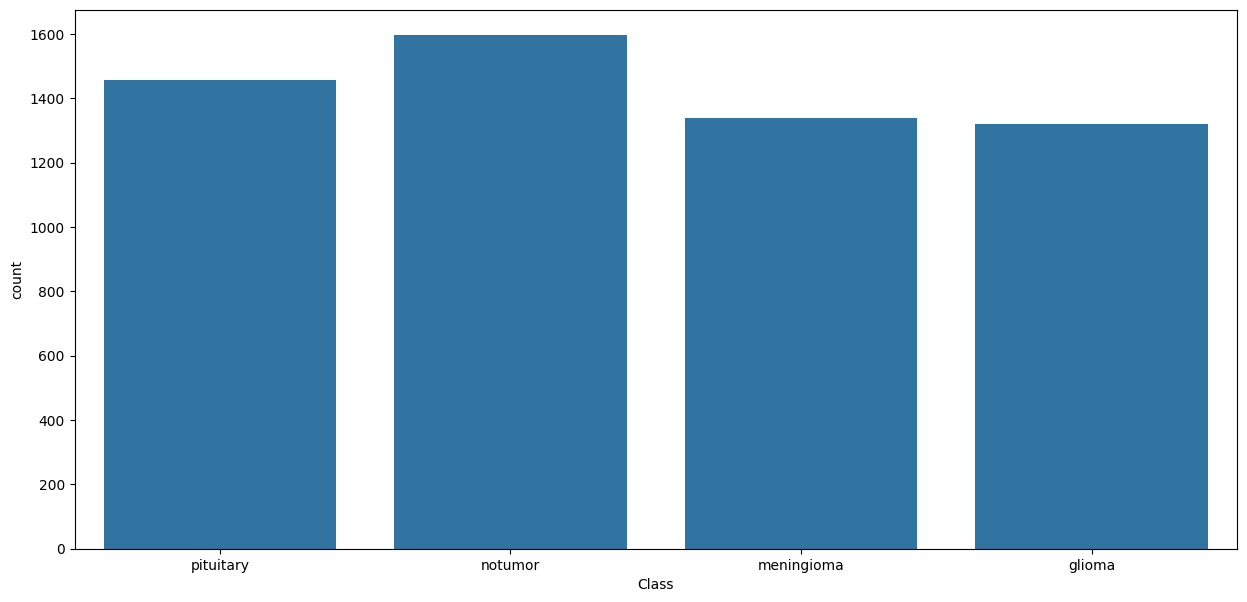

In [ ]:
# Display plot of count of images in each class
# this is a very balanced dataset meaning there are roughly the same number of
# mris for each class type
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_df, x=train_df['Class'])

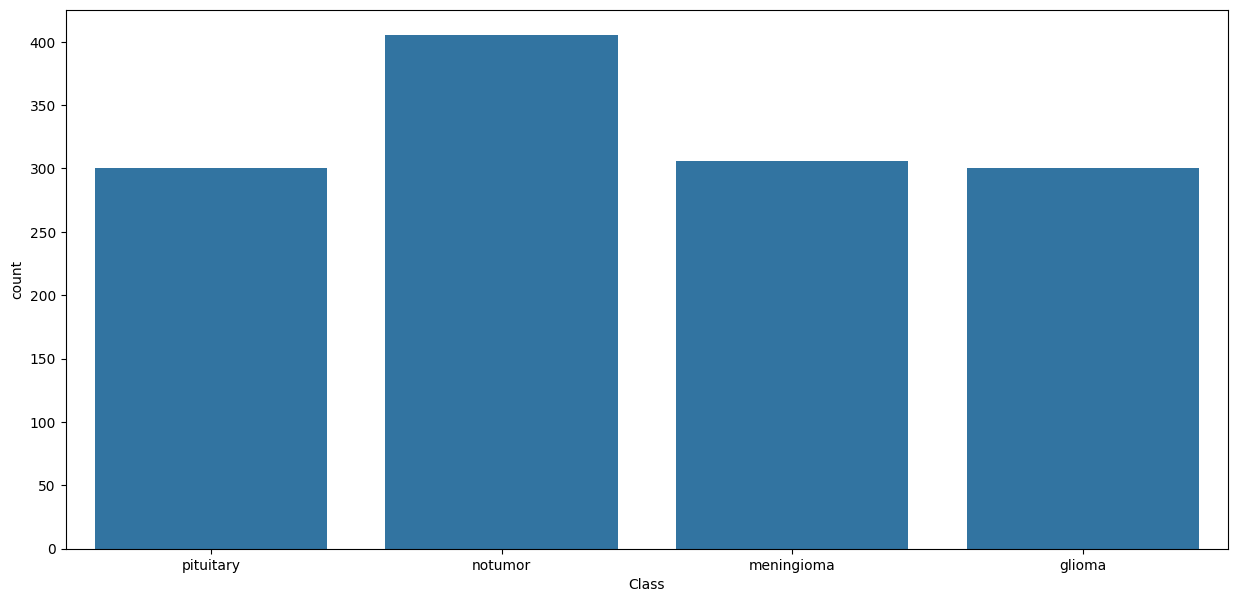

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=test_df, x=test_df["Class"])

In [ ]:
# Now split data into 3: Training data, Testing data, Validation Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix # evaluate performance of the model
import tensorflow as tf
from tensorflow.keras.models import Sequential # allows us to build a model layer by layer
from tensorflow.keras.layers import Dense, Dropout, Flatten #layers, optimizers, and metrics used to train the model
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# split testing data set into testing and validation
# necessary for tuning and to preventing overfitting
valid_df, test_df = train_test_split(test_df, train_size=0.5, stratify=test_df["Class"])
''' train_test_split(
      datasetBeingSplit,
      train_size=0.5 => this defines the size of each split 0.5 means it will split equally in half
      stratify=test_df => this is telling the program to make sure that each split is
                  proportionally the same in each class in comparison to the other split
                  ex. if valid_df has 4 no tumors then test_df would have roughly 4 no tumors
                  *the ratios would balance out in each

    )
    '''

' train_test_split(\n      datasetBeingSplit,\n      train_size=0.5 => this defines the size of each split 0.5 means it will split equally in half\n      stratify=test_df => this is telling the program to make sure that each split is\n                  proportionally the same in each class in comparison to the other split\n                  ex. if valid_df has 4 no tumors then test_df would have roughly 4 no tumors\n                  *the ratios would balance out in each\n\n    )\n    '

In [ ]:
print("VALIDATE DATAFRAME")
valid_df

VALIDATE DATAFRAME


Class Path       Class
522      /content/Testing/notumor/Te-no_0089.jpg     notumor
313      /content/Testing/notumor/Te-no_0322.jpg     notumor
683      /content/Testing/notumor/Te-no_0035.jpg     notumor
503      /content/Testing/notumor/Te-no_0389.jpg     notumor
631      /content/Testing/notumor/Te-no_0348.jpg     notumor
...                                          ...         ...
346      /content/Testing/notumor/Te-no_0133.jpg     notumor
748   /content/Testing/meningioma/Te-me_0209.jpg  meningioma
782   /content/Testing/meningioma/Te-me_0112.jpg  meningioma
1136      /content/Testing/glioma/Te-gl_0275.jpg      glioma
879   /content/Testing/meningioma/Te-me_0148.jpg  meningioma

[655 rows x 2 columns]

In [ ]:
print("TEST DATAFRAME")
test_df

TEST DATAFRAME


Class Path       Class
931   /content/Testing/meningioma/Te-me_0186.jpg  meningioma
629      /content/Testing/notumor/Te-no_0371.jpg     notumor
1294      /content/Testing/glioma/Te-gl_0099.jpg      glioma
274    /content/Testing/pituitary/Te-pi_0021.jpg   pituitary
444      /content/Testing/notumor/Te-no_0271.jpg     notumor
...                                          ...         ...
1214      /content/Testing/glioma/Te-gl_0137.jpg      glioma
646      /content/Testing/notumor/Te-no_0343.jpg     notumor
1115      /content/Testing/glioma/Te-gl_0160.jpg      glioma
164    /content/Testing/pituitary/Te-pi_0270.jpg   pituitary
912   /content/Testing/meningioma/Te-me_0029.jpg  meningioma

[656 rows x 2 columns]

# Preprocessing the Data

In [ ]:
# Batch size is the number of images the model will process at once
batch_size = 32 #common batch sizes 16, 32, 64, 128  ==> EXPERIMENT WITH DIFFERENT SIZES

# resize all images are the same size to rmv the descrepency probability
img_size = (299, 299)

# rescale the pixel values and adjusting their brightness to help model be more robust and generalized to more data
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

# need to have a separate image generator for test data to make sure
# any generalizations made during training are correct in testing w/o changes
test_gen = ImageDataGenerator(rescale=1/255)


In [ ]:
# Create Training Data Flow
train_gen = image_generator.flow_from_dataframe(train_df,
                                                x_col="Class Path",
                                                y_col="Class",
                                                batch_size=batch_size,
                                                target_size=img_size
                                                )
# Create Validation Data Flow
valid_gen = image_generator.flow_from_dataframe(valid_df,
                                                x_col="Class Path",
                                                y_col="Class",
                                                batch_size=batch_size,
                                                target_size=img_size
                                                )

# Create Testing Data Flow
test_gen = test_gen.flow_from_dataframe(test_df,
                                        x_col="Class Path",
                                        y_col="Class",
                                        batch_size=16, # smaller batch size to set model up for success during testing
                                        target_size=img_size,
                                        shuffle=False #want order of the data to remain consistent
                                        )

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


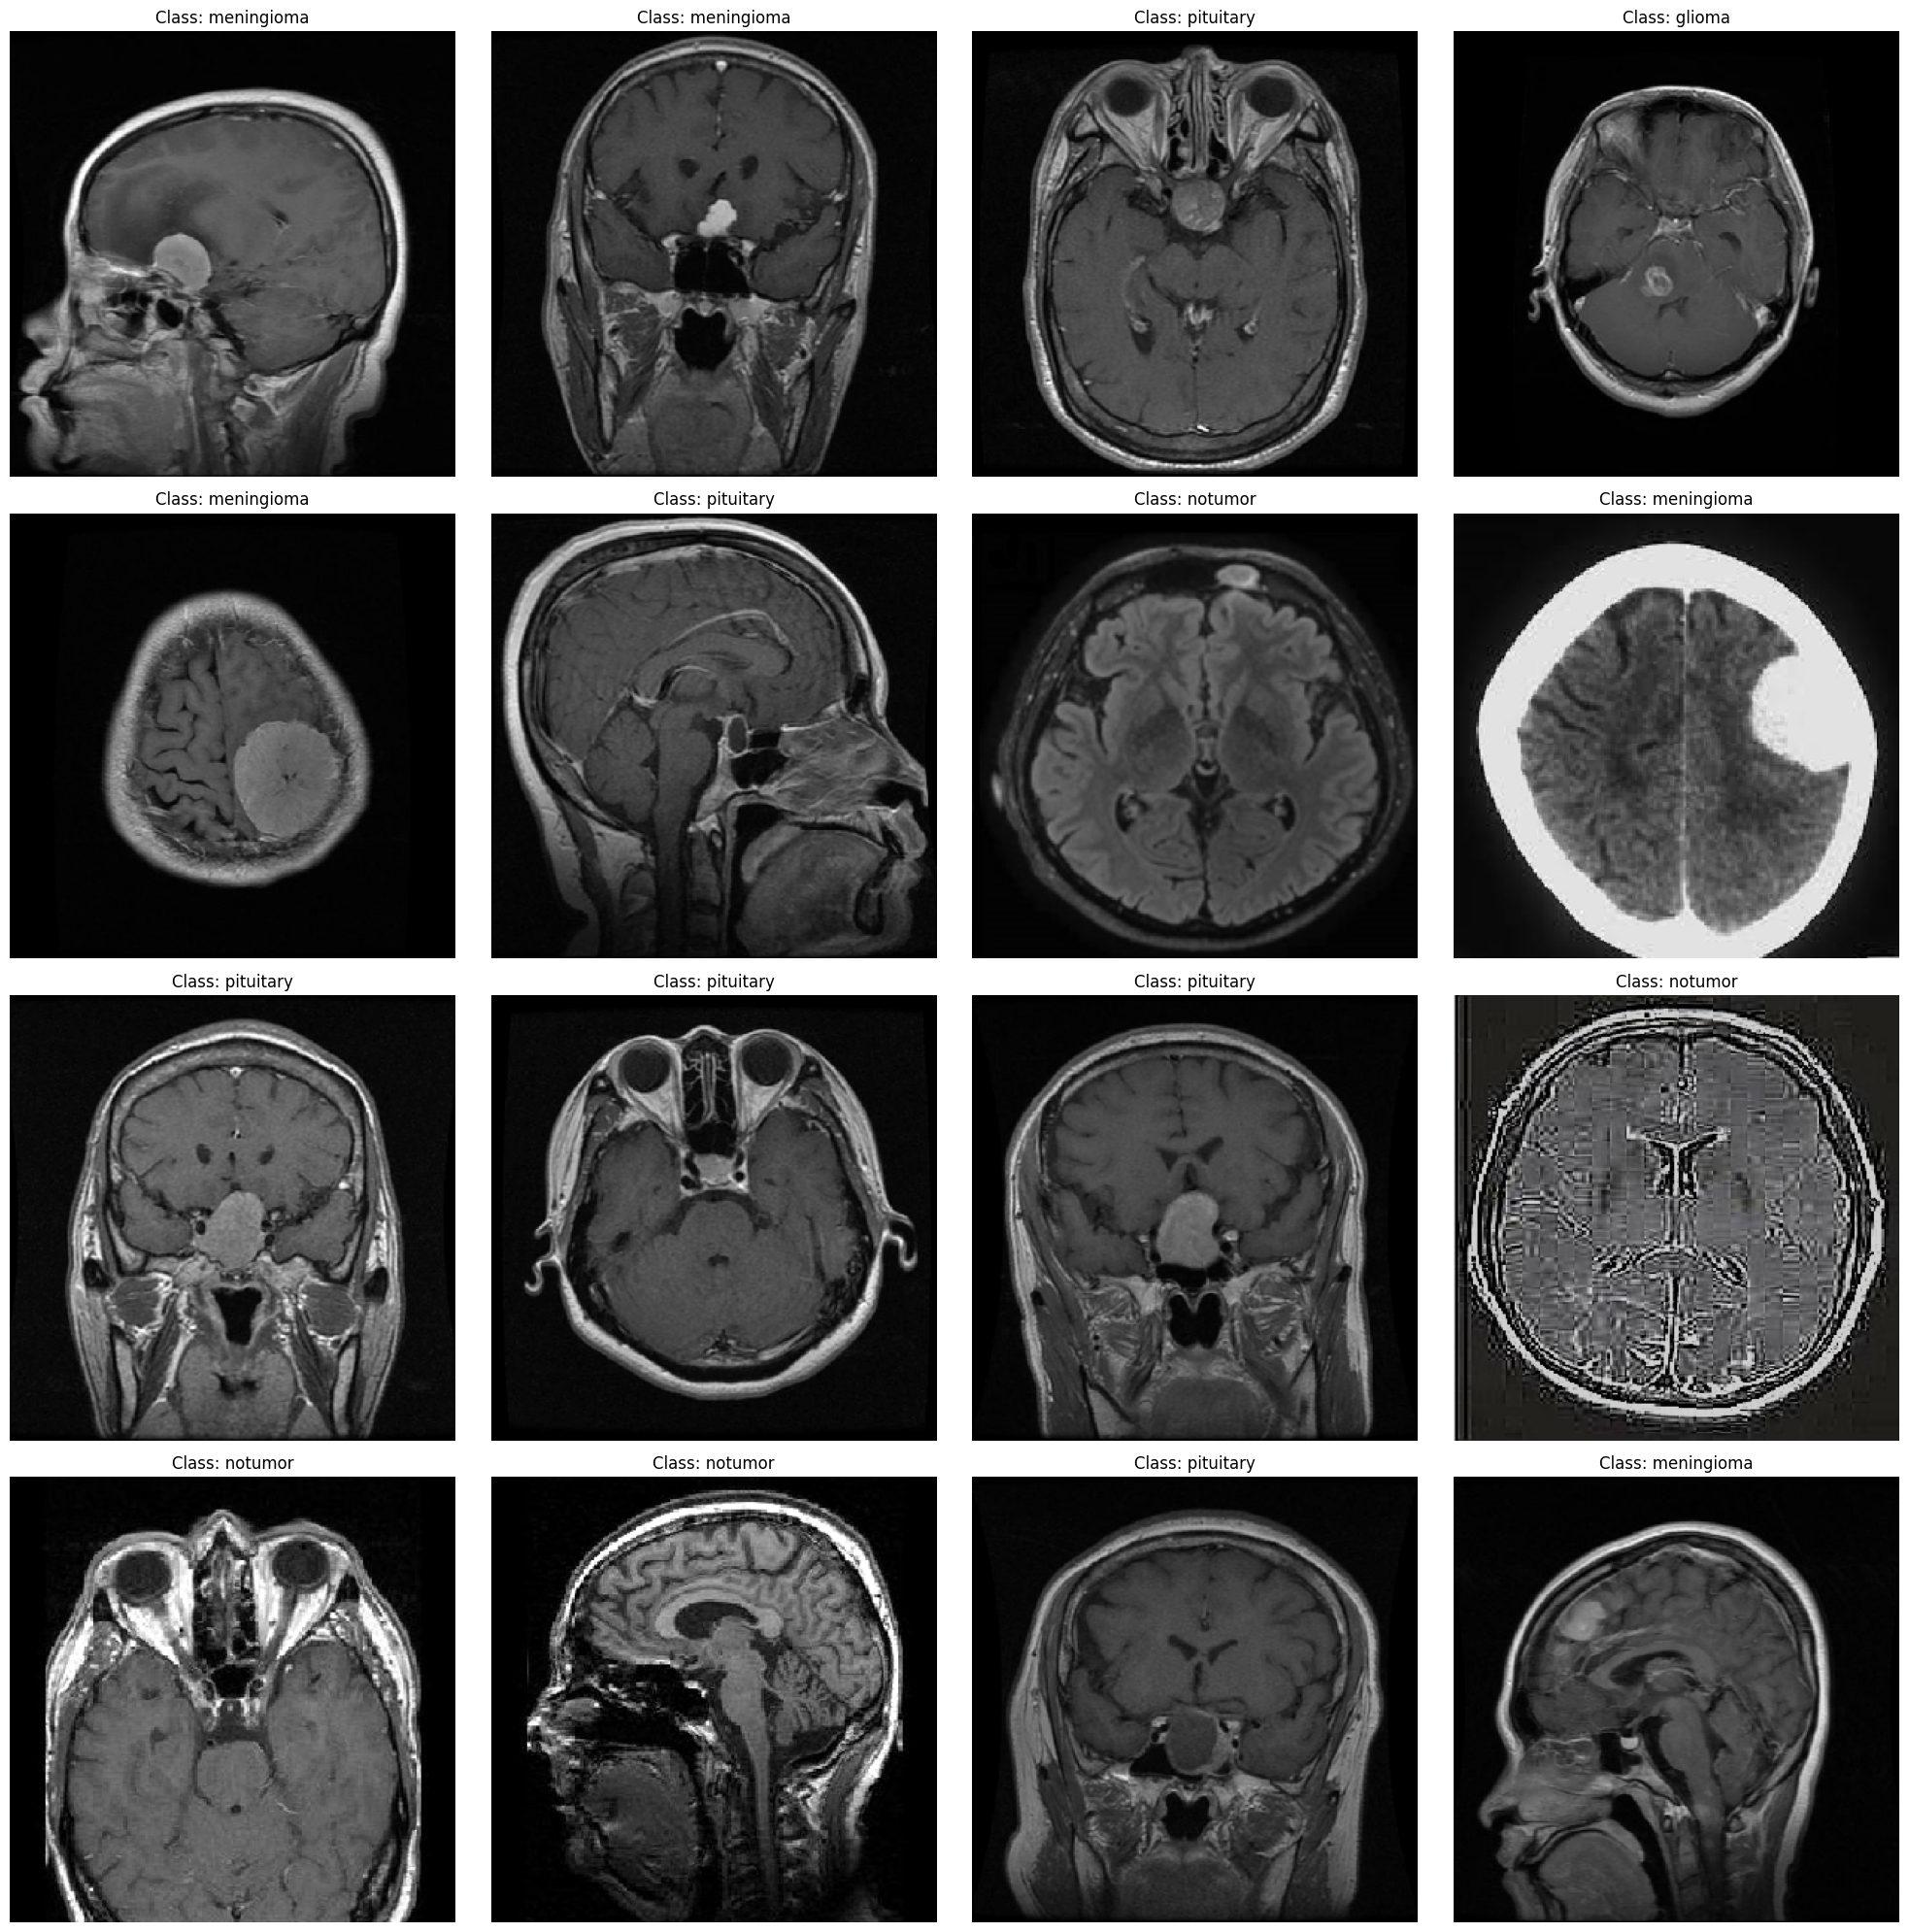

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(train_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  #Get the list of class names and class indices
  class_names = list(train_gen.class_indices.keys())
  class_indices = list(train_gen.class_indices.values())

  #Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  #Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

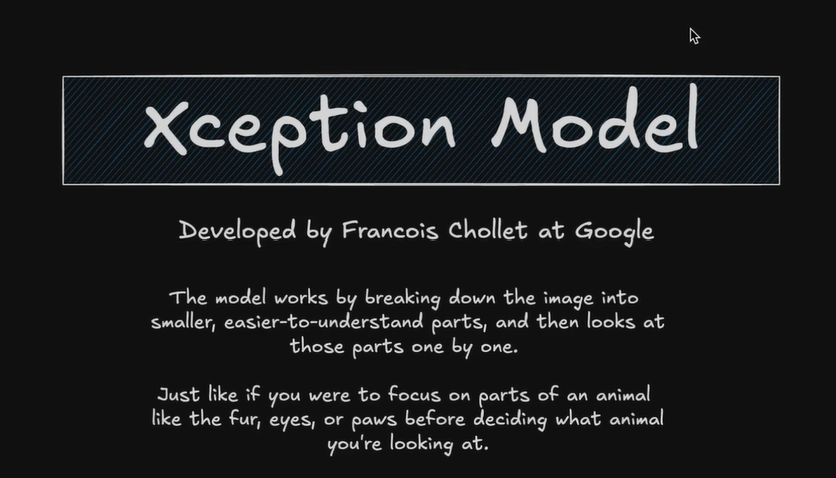

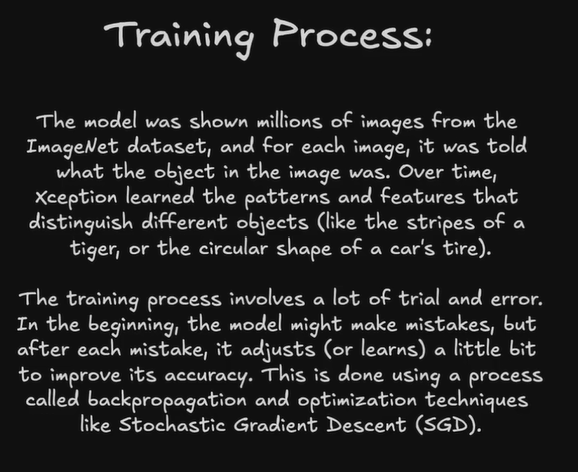

This is a Neural networking model that utilizes image recognition. By breaking down the image into smaller and smaller parts.

*It was trained on ImageNet

# Transfer Learning

Adapting a larger pretrained model to a new task

*For this project the model trained by ImageNet is getting adapted to classify brain tumors

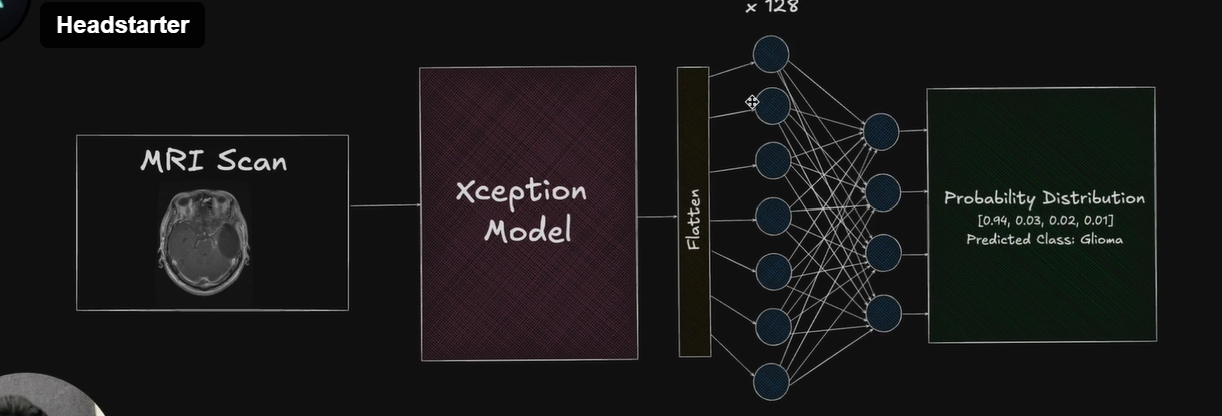

1. Retrieve our input, the MRI scan
2. Put input through the [Xception model](https://keras.io/2.17/api/applications/xception/) that will use smart filters to process through the input and identify the key features (i.e fatty tissue, tumor type, etc)
3. After going through the model the information we get back is a tensor (a multidimensional array of data that can be used to represent and organize data) => housing all the key features identified in the model
4. To use the tensor we need to "Flatten" the tensor into a 1-dimensional array => multiple arrays become a single array

In [ ]:
img_shape = (299, 299, 3) #(width, height, # of color channels)
# these images are in rgb format meaning they have 3 color channels

base_model = tf.keras.applications.Xception(
    include_top = False, #using pretrained extraction layers but also using our own classifications
    weights = "imagenet", # we are using the weights pretrained in the model from imagenet
    input_shape = img_shape, # only needs to be set when 'include_top' is False
    pooling = 'max' # looks at small sections one at a time and keeps the most important/crucial details
    # smart summarization with key features
    # pooling is an optional component when 'include_top' is False
)

#Define our full model using the base_model defined earlier
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3), # drop neurons based on the previous flatten() layer
    Dense(128, activation="relu"), # relu is a fcn that helps model learn non-linear relationships b/w input and output
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

### Dropout() Layer
*   Prevents overfitting
    - when the model learns the training dataset TOO well and starts to function poorly on new/unseen data
*   Will randomly drop neurons in the model during training to help the model generalize better/new data

### Dense(# of neurons, activation fcn) Layer
- Common in the lase Dense() Layer:
  - # of neurons = # of classes
  - 'softmax' activation
    - takes the output from the last layer and transforms it into a probability prediction for each layer
      - The sum of the probabilities is 100%
      - the highest probability is the prediction class
      




In [ ]:
# FINAL STEP in building the model and getting it ready for training
# Compile the model
model.compile(Adamax(learning_rate=0.001), # 0.001 is a good starting learning rate
              loss = 'categorical_crossentropy', # finding the lowest loss for the model based on provided loss function
              metrics = ['accuracy',
                         Precision(),
                         Recall()])

#### Adamax
- An adaptive guide/learning assistant for the model
  - learning_rate [rate is traversed across the loss fcn in image below]
    - smll learning rate = slow training + more indepth & accurate knowledge
      - could take a long time to converge on the correct solution
      - higher cost
    - larger learning rate = faster training + shallow % less accurate knowledge base
      - can also cause the model to overshoot the actual weights and never converge on a good solution
      - lower cost
  - Loss = diff. b/w predicted output and actual output
    - 'categorical_crossentropy' penalizes the model more
heavily for incorrect predictions
      - returns loss % (want to aim for a low loss amt)
  - Metrics (tracked by model)
    - accuracy = % of correct predictions
    - Precision() = % of true positives
    - Recall() = % of true positives that were correctly predicted

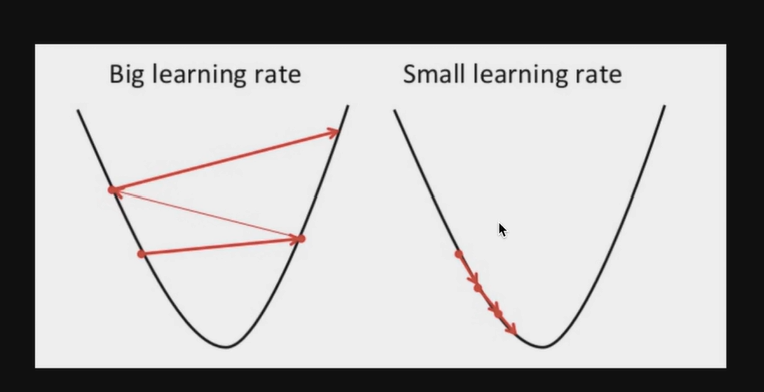

In [ ]:
# Train our model
# NOTE: change runtime in collab to use GPU then restart and rerun cells

hist = model.fit(train_gen, epochs=6, validation_data=valid_gen)
# epochs=5 => the model will go through the training data set 5 times
# & will adjust its weights based on the loss and metrics we set earlier



Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.7847 - loss: 0.5722 - precision: 0.8326 - recall: 0.7212 - val_accuracy: 0.9344 - val_loss: 0.1945 - val_precision: 0.9438 - val_recall: 0.9237
Epoch 2/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 852ms/step - accuracy: 0.9822 - loss: 0.0567 - precision: 0.9827 - recall: 0.9793 - val_accuracy: 0.9802 - val_loss: 0.0578 - val_precision: 0.9891 - val_recall: 0.9740
Epoch 3/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 198s 828ms/step - accuracy: 0.9956 - loss: 0.0213 - precision: 0.9962 - recall: 0.9951 - val_accuracy: 0.9832 - val_loss: 0.0572 - val_precision: 0.9832 - val_recall: 0.9817
Epoch 4/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 818ms/step - accuracy: 0.9940 - loss: 0.0199 - precision: 0.9950 - recall: 0.9935 - val_accuracy: 0.9817 - val_loss: 0.0766 - val_precision: 0.9832 - val_recall: 0.9817
Epoch 5/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 204s 828ms/step - accuracy: 0.9971 - loss: 0.0121 - precision: 0.9971 - recall: 0.9969 - val_accuracy: 0.9847 - val_loss: 

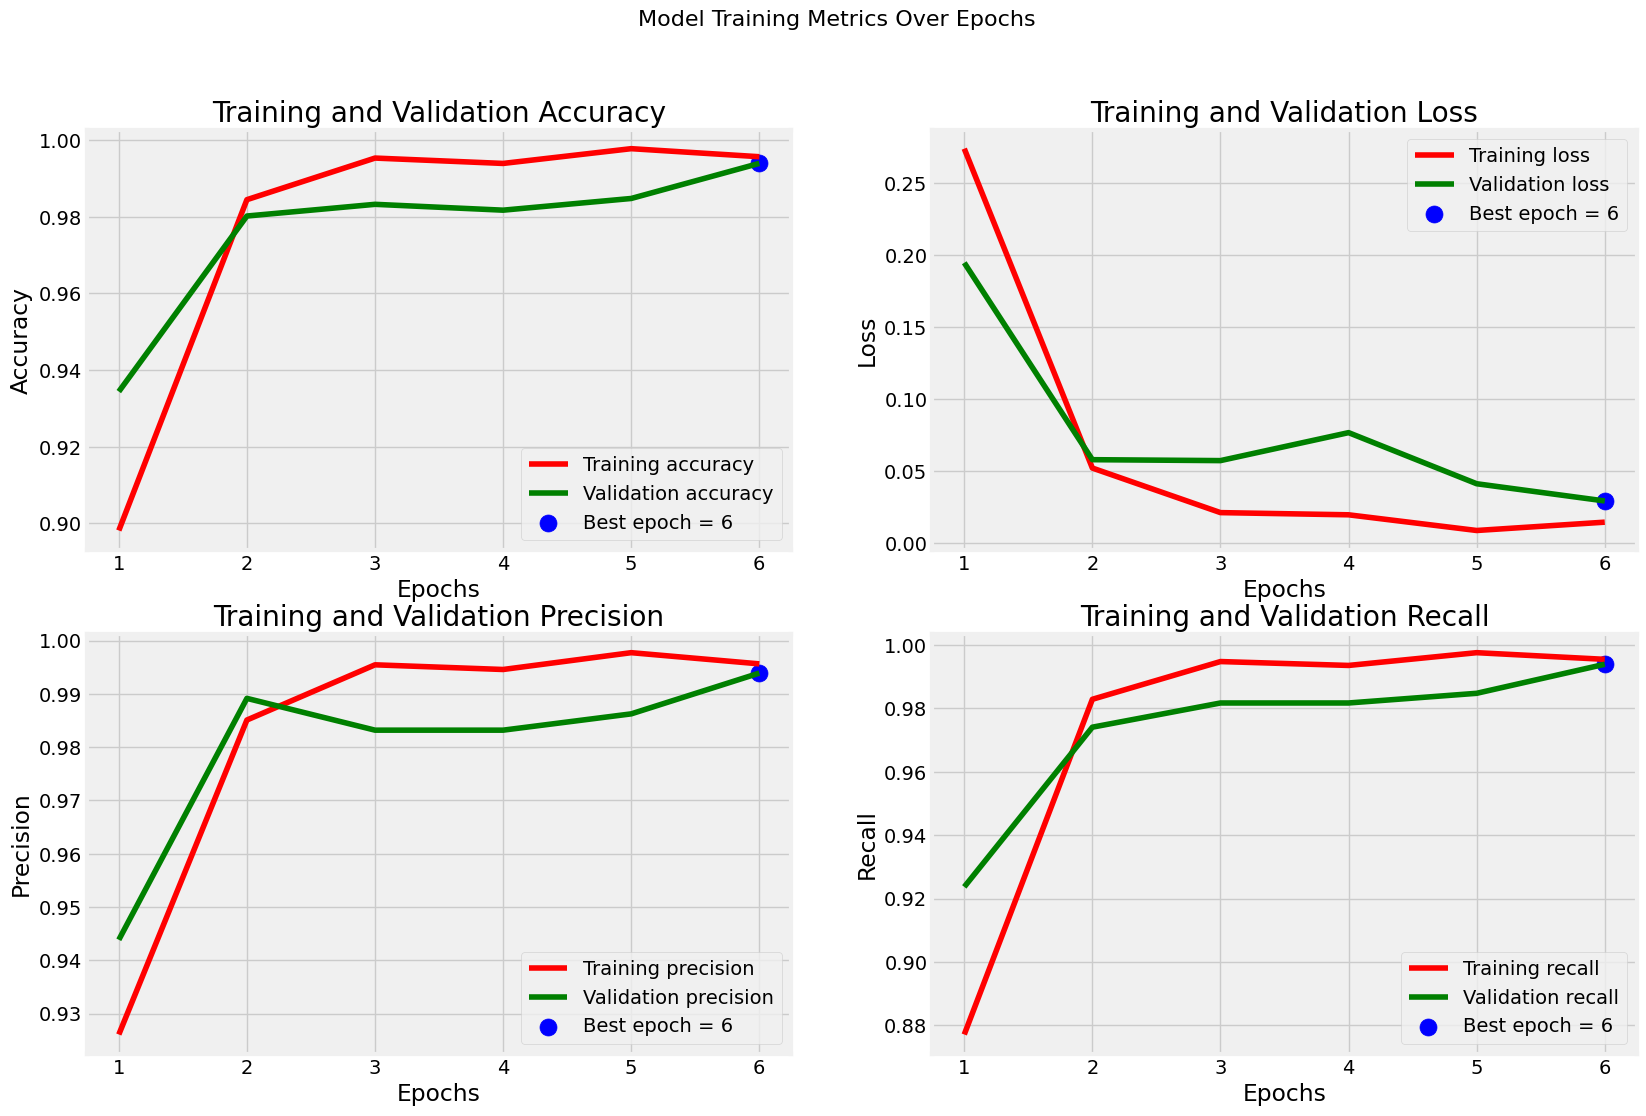

In [ ]:
#Visualize the training metrics of each epoch

# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
train_metrics = {m: hist.history[m] for m in metrics}
validation_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
# Find lowest loss in our training history/when it made the least amt of mistakes
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(validation_metrics[m])
  else:
    idx = np.argmax(validation_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = validation_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

# Create 4 plots
# Model Accuracy over time, Model Loss over time, Model Precision, Model Recall
for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(train_metrics[metric]) + 1)

  plt.plot(epochs, train_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, validation_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
# Evaluate Model on all datasets [Training, Test, Validation]
# evaluating model based on data it knows and trained on
train_score = model.evaluate(train_gen, verbose=1) # How well model learned patterns, etc.
# helps verify if model is generalizing well since we used it to track
# the models accuracy during training but the model never actually learned this data
validation_score = model.evaluate(valid_gen, verbose=1) # If training process was effective
# true measure of models performance since this is completely new and unseen data
test_score = model.evaluate(test_gen, verbose=1) # How model will perform realistically in production

# verbose=1 means the model will provide a progress bar and detailed metrics as the model runs

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f"\n\nValidation Accuracy: {validation_score[1]*100:.2f}%")
print(f'Validation Loss: {validation_score[0]:.4f}')
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f'Test Loss: {test_score[0]:.4f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.9985 - loss: 0.0040 - precision: 0.9985 - recall: 0.9985
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.9944 - loss: 0.0175 - precision: 0.9944 - recall: 0.9944
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 1.0000 - loss: 9.4323e-06 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9945 - loss: 0.0262 - precision: 0.9945 - recall: 0.9945
Train Accuracy: 99.93%
Train Loss: 0.0026


Validation Accuracy: 99.39%
Validation Loss: 0.0202


Test Accuracy: 99.24%
Test Loss: 0.0263


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step


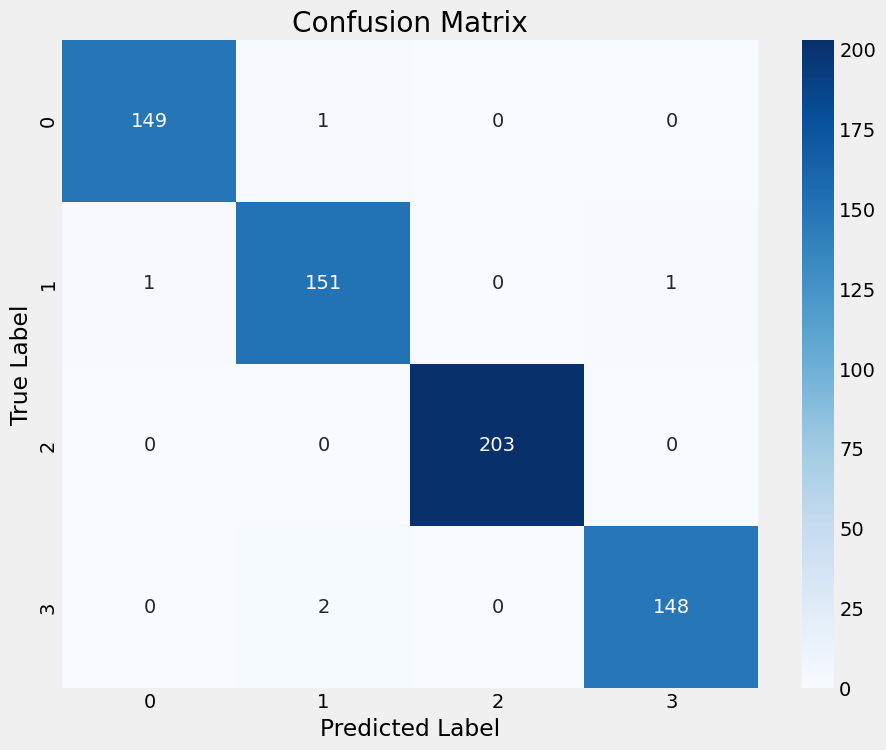

In [ ]:
# Visualize how well the model does for each class
preds = model.predict(test_gen) # asking model to make predictions on the mri scans in testing dataset
# output probabilities are how confident the model is that the mri fits into each class
y_pred = np.argmax(preds, axis=1) # convert probability into actual predictions
# picks class the model is most confident about

# map class names to numerical indices
class_dict = {
    0: 'glinoma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Then create and display the confusion matrix
# Confusion Matrix: shows us exactly where model succeeds and fails
cm = confusion_matrix(test_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label") #what model thought the mri was
plt.ylabel("True Label") # what it actually was
plt.title('Confusion Matrix')
plt.show()

# for the plot itself
# #'s on the diagonal are what the model got right
# #'s off the diagnol are what the model got wrong
# we want higher numbers on the diagonal and lower numbers elsewhere

# this data can be used to see which labels are most commonly being mixed for the model

In [ ]:
# Create function to visualize the predictions on provided test image
from PIL import Image

# Takes in an MRI scan and returns two things
# 1. the original image
# 2. A bar chart showing the probability the MRI is each class
# also includes a response of the predicted tumor type
def predict(img_path: str) -> None:
  # Get class labels (tumor types)
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
   #(make image the same size as images used for training)
  img = Image.open(img_path)
  resized_img = img.resize( (299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions [0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow (resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot (2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars

  ax = plt.gca()

  ax.bar_label(bars, fmt="%.2f")
  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


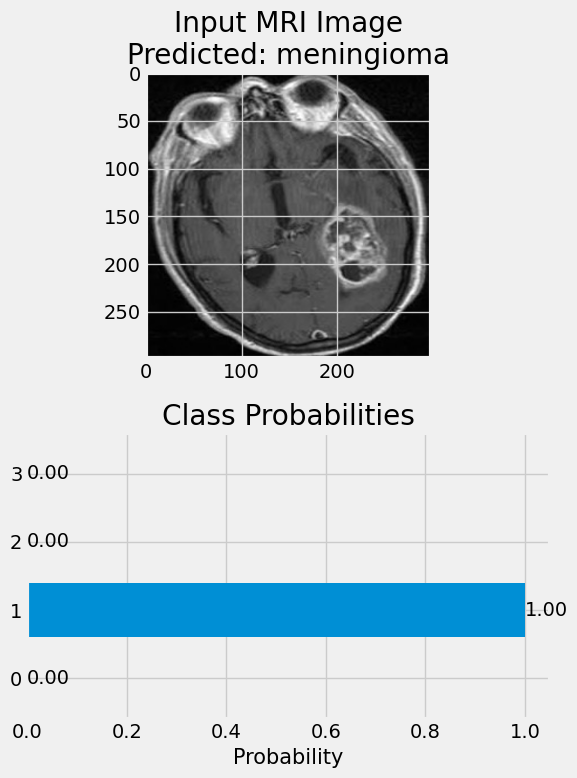


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0001.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


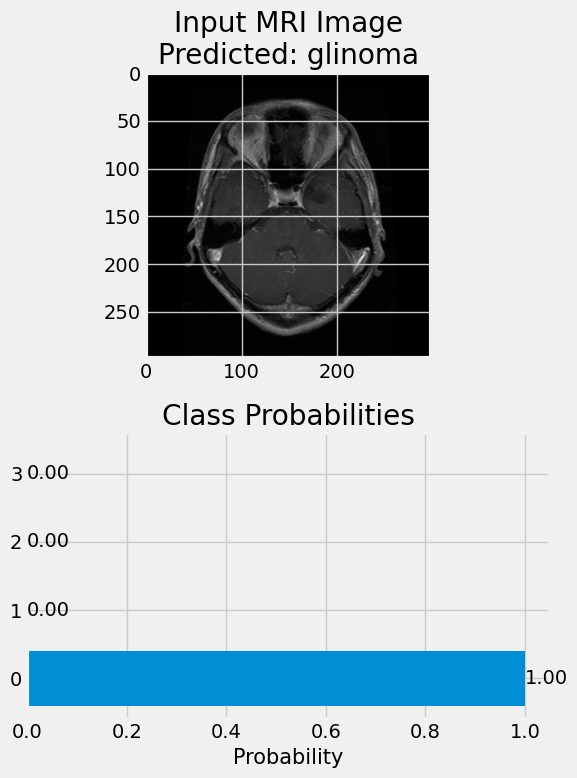


Predicted tumor type: glinoma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0001.jpg")

In [ ]:
# Save models weights to use later in web app (will save weights to a file)
model.save_weights("xception_model.weights.h5")

# Convulutional Neural Network (CNN)
- use convolution operation to analyze patterns in images

** Goal: is to train a smaller CNN model to use
- cheaper to deploy (less parameters and layers meaning less computing power needed)

### Main Layers
1. Convulutional Layer (ie Conv2D)
2. MaxPooling Layer
3. Dropout() Layer

**Another potential layer is BatchNormalization()
- improves the stability and speed of training the neuros

### To Test Performance:
- Add/remove layers
- Change # of filters
  - '#' of filters either increase of decrease by the power of 2 through each block
  EX. [32, 64, 128, 64, 32]

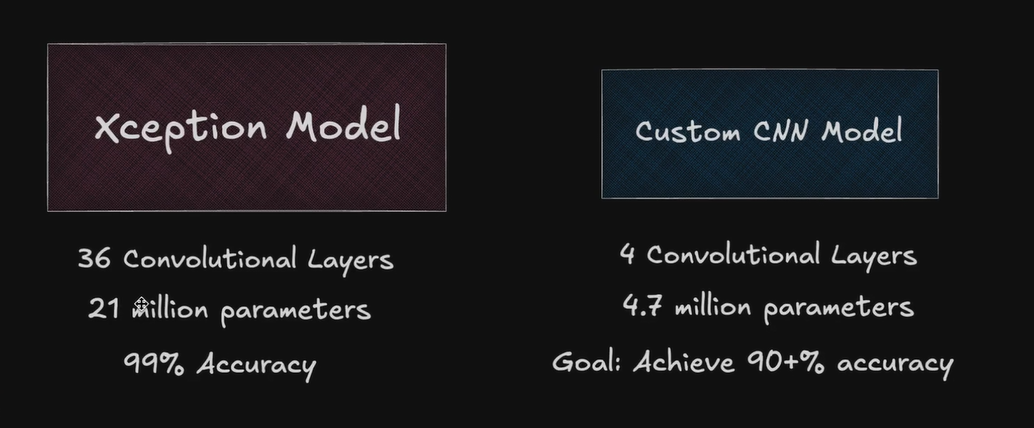

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
# Batch size is the number of images the model will process at once
batch_size = 16
img_size = (224, 224)
#both of the above reduce the memory usage needed

# rescale the pixel values and adjusting their brightness to help model be more robust and generalized to more data
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

test_gen = ImageDataGenerator(rescale=1/255)

# Create Training Data Flow
train_gen = image_generator.flow_from_dataframe(train_df,
                                                x_col="Class Path",
                                                y_col="Class",
                                                batch_size=batch_size,
                                                target_size=img_size
                                                )
# Create Validation Data Flow
valid_gen = image_generator.flow_from_dataframe(valid_df,
                                                x_col="Class Path",
                                                y_col="Class",
                                                batch_size=batch_size,
                                                target_size=img_size
                                                )

# Create Testing Data Flow
test_gen = test_gen.flow_from_dataframe(test_df,
                                        x_col="Class Path",
                                        y_col="Class",
                                        batch_size=16,
                                        target_size=img_size,
                                        shuffle=False #want order of the data to remain consistent
                                        )

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
# Create 4 Convolutional Blocks
# each block has a different number of convolutional filters
# Filters extract features like edges, shapes, textures, etc.
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # focuses the model on most important features and reduces the # of parameters

# more complex patterns based on first block of filters
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))
# Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001),
                  loss='categorical_crossentropy',
                  metrics= ['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,0

 Total params: 4,780,484 (18.24 MB)

 Trainable params: 4,778,052 (18.23 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [ ]:
#Train model
history = cnn_model.fit(train_gen, epochs=8, validation_data=valid_gen)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 98/357 ━━━━━━━━━━━━━━━━━━━━ 3:58:39 55s/step - accuracy: 0.5964 - loss: 5.9808 - precision: 0.6426 - recall: 0.5473

KeyboardInterrupt: 

In [ ]:
print(history.history.keys()) # verify the key/metric names to use in next step

In [ ]:
#Visualize the training metrics of each epoch

# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
train_metrics = {m: history.history[m] for m in metrics}
validation_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
# Find lowest loss in our training history/when it made the least amt of mistakes
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(validation_metrics[m])
  else:
    idx = np.argmax(validation_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = validation_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

# Create 4 plots
# Model Accuracy over time, Model Loss over time, Model Precision, Model Recall
for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(train_metrics[metric]) + 1)

  plt.plot(epochs, train_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, validation_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

NameError: name 'history' is not defined

In [ ]:
train_score = cnn_model.evaluate(train_gen, verbose=1) # How well model learned patterns, etc.
validation_score = cnn_model.evaluate(valid_gen, verbose=1) # If training process was effective
test_score = cnn_model.evaluate(test_gen, verbose=1) # How model will perform realistically in production

print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')
print(f"\n\nValidation Accuracy: {validation_score[1]*100:.2f}%")
print(f'Validation Loss: {validation_score[0]:.4f}')
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f'Test Loss: {test_score[0]:.4f}')

In [ ]:
# Visualize how well the model does for each class
preds = cnn_model.predict(test_gen) # asking model to make predictions on the mri scans in testing dataset
# output probabilities are how confident the model is that the mri fits into each class
y_pred = np.argmax(preds, axis=1) # convert probability into actual predictions
# picks class the model is most confident about

# map class names to numerical indices
class_dict = {
    0: 'glinoma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

#Then create and display the confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label") #what model thought the mri was
plt.ylabel("True Label") # what it actually was
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
# takes in the true classes for the images vs the predicted classes
clr = classification_report(test_gen.classes, y_pred)
print(clr)

#NOTE:
# EX. for precision, the model is incorrectly identifying
# other tumors as being "no tumor"
# for recall, it is accurately identifying almost all "no tumor" cases
# this could be a problem in the medical field since tumors would take
# longer to be diagnosed

In [ ]:
cnn_model.save('cnn_model.h5')

# Part 2: Streamlit Web App

In [ ]:
! pip install streamlit pyngrok python-dotenv

# streamlit allows us to create web app with python
# pyngrok allows us to create a secure url for our app (encrypted traffic)
# python-dotenv allows us to load in our env. variables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
from threading import Thread
# threadingallows us to run the streamlit UI and server cocurrently in colab
from pyngrok import ngrok
# allows us to expose our locally running streamlit app to a public url for others to view/use
from google.colab import userdata # ability to use secrets in colab

In [ ]:
ngrok_token = userdata.get("NGROK_AUTH_TOKEN")

ngrok.set_auth_token(ngrok_token)

In [ ]:
# Define helper fcn to run Streamlit App
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")
  # run app.py file and the server on port 8501

In [ ]:
%%writefile app.py
# the command above creates the app.py file and adds the below code
# make all app changes in this cell
# every time it is rerun the app.py file will be overwritten with the changes made in the cell
# will also need to rerun the thread and public_url cells when changes are made

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

# set up genai library
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# create saliency folder if it doesn't exist to store generated saliency maps
output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence, lvl):
  lvl_text = "child" if lvl == "None" else lvl + "neurologist"

  prompt = f"""You are an expert neurologist tasked with explaining a saliency map of a brain tumor MRI scan to a {lvl_text}.
  The saliency map was generated by a deep learning model that was trained to classify brain tumors in one of the following categories: glioma, meningioma, pituitary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the MRI scan to be of class {model_prediction} with a confidence of {confidence * 100}%.

  In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' in your explaination.
    - Keep your explaination under 6 sentences.
    - Make sure your explanation is easy to understand for your audience which is a {lvl_text}

    Let's think step by step about this. Verify step by step.
  """

  # get MRI saliency scan image
  img = PIL.Image.open(img_path)

  # generate response based on saliency scan and prompt
  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text

# if saliency map is completely different than the data that could
# mean the model is reviewing data that isn't actually important
def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  # resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanceed contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img

def load_xception_model(model_path):
  # rebuild the models architecture exactly how you built it during training
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False,
                                             weights="imagenet",
                                             input_shape= img_shape,
                                             pooling="max"
                                             )
  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss="categorical_crossentropy",
                metrics=['accuracy', Precision(), Recall()])

  #Load weights into the model so we can use them to make predictions
  model.load_weights(model_path)

  return model # allows us to use our model in the rest of the code

# App UI Starts here
st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

#Upload images to streamlit app
# below creates an uploader widget for the user to use
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# if user uploaded a file, allow user to select model to use in their file classification
if uploaded_file is not None:
  # Radio btn for user selection of model
  selected_model = st.pills(
      "Select Model",
      ["Transfer Learning - Xception", "Custom CNN"],
      selection_mode='single',
      default= ["Custom CNN"]
  )

  # load in selected model
  if "Transfer Learning - Xception" in selected_model:
    # xception needs a custom load model fcn
    model = load_xception_model("/content/xception_model.weights.h5")
    img_size = (299, 299) # adjust image size based on training img size
  else:
    # cnn can use the imported load_model() from tensorflow
    model = load_model("/content/cnn_model.h5")
    img_size = (224, 224)

  st.write(f"## {selected_model}: Results")

  # Process the uploaded image
  labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'] # Define classes
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0 # normalize pixel values to be b/w 0 and 1

  prediction = model.predict(img_array)

  # Get class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  # show prediction results to user
  st.write(f"Prediction Class: {result}")
  st.write("Predictions:")
  # show confidence levels for all classes
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  # 1. understand what parts of the image the model is focusing on
  # 2. understand what parts of the brain the model is looking at
  # add saliency map to show what the model is looking at
  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_column_width=True)

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
      <div style='background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;'>
        <div style='display: flex; justify-content: space-between; align-items: center;'>
          <div style='flex: 1; text-align: center;'>
            <h3 style='color: #ffffff; margin-bottom: 10px; font-size: 20px;'>Prediction</h3>
            <p style='font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;'>
            {result}
            </p>
          </div>
          <div style='width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;'></div>
          <div style='flex: 1; text-align: center;'>
            <h3 style='color: #ffffff; margin-bottom: 10px; font-size: 10px;'>Confidence</h3>
            <p style='font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;'>
              {prediction[0][class_index]:.4%}
            </p>
          </div>
        </div>
      </div>
       """,
      unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title="Probability",
      yaxis_title="Class",
      height=400,
      width=600,
      yaxis=dict(autorange='reversed')
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4f}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  # Display the plotly chart
  st.plotly_chart(fig)

  # add explaination on how model came to that conclusion and why it is focusing on what was shown in the map above

  # have user decide the explanation level (ie "No Idea", Beginner", "Professional", "Expert")
  explanation_lvl = st.selectbox(
      "Please select your level of understanding:",
      ("", "None", "Beginner", "Professional", "Expert")
  )

  # genai_model = st.selectbox(
  #     "Select LLM to generate explanation:",
  #     ("", "gemini-1.5-flash", "")
  # )

  # if explanation_lvl != "" && genai_model != "":
  # get path of saliency map
  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  # use saliency path, model prediction, and model confidence to generate explanation
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index], explanation_lvl)

  st.write(f"## {explanation_lvl if explanation_lvl != 'None' else 'No Background'} Explanation")
  st.write(explanation)


Overwriting app.py


In [ ]:
# Create a new thread to run the run_streamlit() in the background
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
# Create public url for app
public_url = ngrok.connect(addr="8501", proto="http", bind_tls=True)
# addr = port used
# proto = protocol, in this case http
# bind_tls = telling ngrok to provide an https external url for users

print("Public URL: ", public_url)

Public URL:  NgrokTunnel: "https://0887-34-32-214-242.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# If you receive an error for "may not run more than 3 tunnels"
# After disconnecting you can rerun the thread and public url cells
# Disconnect your ngrok tunnels
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://df00-34-32-214-242.ngrok-free.app -> http://localhost:8501


In [ ]:
%%writefile .env

GOOGLE_API_KEY=<put your google api key here>

Writing .env
